In [1]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d
import csv
import glob
import os
import pandas as pd
from scipy.signal import lfilter, savgol_filter
%matplotlib inline


In [46]:
## formal inpout data

def interpolate_pupil(data, window=20):
    data['LeftPupilD'][data['LeftPupilD']<0] = np.nan
    data['RightPupilD'][data['RightPupilD']<0] = np.nan
    data = data.interpolate(method='linear',axis=0,limit_direction ='both')
    data.dropna(axis=0)
    # data_m = moving_fil(data,shi)
    data_s = SG_fil(data,window+1,2)
    return data_s

def SG_fil(data,window=91,order=2):
    df = data.copy()
    column_name = df.columns.tolist()
    df_new = pd.DataFrame(columns=column_name)
    for n in column_name:
        df_new[n] = savgol_filter(df.loc[:,n],window,order)
    return df_new   


path_data = './Data/'
data_collection = ['LeftPupilD','RightPupilD','Lumin']
data=[]
print(os.listdir(path_data))
for file_path in os.listdir(path_data):
    t=pd.read_csv(path_data+file_path,index_col=0)
    t = interpolate_pupil(t[data_collection])
    t.index = range(len(t))
    t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data.append(t[data_collection])

startPoints = pd.read_csv('startpoints.csv')

print(data[0])

['P02_1_Easy_05_HMD637618548348018799_1.csv', 'P02_1_Easy_10_HMD637618553501865629_2.csv', 'P02_1_Easy_15_HMD637618559322581515_3.csv', 'P02_2_Hard_05_HMD637618565258045178_1.csv', 'P02_2_Hard_10_HMD637618578508316418_2.csv', 'P02_2_Hard_15_HMD637618583010995067_3.csv', 'P02_3_Easy_05_HMD637618591776604248_1.csv', 'P02_3_Easy_10_HMD637618596819201873_2.csv', 'P02_3_Easy_15_HMD637618605451263003_3.csv', 'P02_4_Hard_05_HMD637618612565682531_1.csv', 'P02_4_Hard_10_HMD637618617486820957_2.csv', 'P02_4_Hard_15_HMD637618623140113650_3.csv', 'P04_1_Easy_05_HMD637619601918429736_1.csv', 'P04_1_Easy_10_HMD637619607142544865_2.csv', 'P04_1_Easy_15_HMD637619611916687502_3.csv', 'P04_2_Hard_05_HMD637619622023204759_1.csv', 'P04_2_Hard_10_HMD637619627185989342_2.csv', 'P04_2_Hard_15_HMD637619632334210356_3.csv', 'P04_3_Easy_05_HMD637619646825200003_1.csv', 'P04_3_Easy_10_HMD637619651831516987_2.csv', 'P04_3_Easy_15_HMD637619656603939214_3.csv', 'P04_4_Hard_05_HMD637619662905640595_1.csv', 'P04_4_Ha

D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=T

       LeftPupilD  RightPupilD     Lumin
0       -0.070791    -0.075895  0.000000
1        0.031856     0.034153  0.000000
2        0.135125     0.144866  0.000000
3        0.239014     0.256246  0.000000
4        0.343524     0.368291  0.000000
...           ...          ...       ...
30869    3.901651     3.844230  0.291853
30870    3.913750     3.855149  0.291871
30871    3.925388     3.866184  0.292018
30872    3.936568     3.877336  0.292293
30873    3.947288     3.888603  0.292697

[30874 rows x 3 columns]


D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [4]:
## pupil lumim function
def left_adjust(coeff_left,x,power):
    if power == 2:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2) + coeff_left[3] * np.power(x,power-3) + coeff_left[4] * np.power(x,power-4) + coeff_left[5] * np.power(x,power-5)
    return y
def right_adjust(coeff_right,x,power):
    if power == 2:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2) + coeff_right[3] * np.power(x,power-3) + coeff_right[4] * np.power(x,power-4) + coeff_right[5] * np.power(x,power-5)
    return y



In [48]:
# for test, choose which file
for data_index in range(116,216):
    
    # start frame
    start = int(startPoints.iloc[[data_index]].bsStart)
    # end frame
    end = int(startPoints.iloc[[data_index]].bsEnd)
    # lumin times adjustion
    multi_lumin = 255

    # equation matching
    x_lumin_V = data[data_index][['Lumin']][start:end].values.ravel()*multi_lumin
    left_original_pupil_V = data[data_index][['LeftPupilD']][start:end].values.ravel()
    right_original_pupil_V = data[data_index][['RightPupilD']][start:end].values.ravel()
    power_coeff = 2
    coeff_left = polyfit(x_lumin_V, left_original_pupil_V, power_coeff)
    coeff_right = polyfit(x_lumin_V, right_original_pupil_V, power_coeff)




    x_lumin = data[data_index][['Lumin']].values.ravel()*multi_lumin
    left_original_pupil = data[data_index][['LeftPupilD']].values.ravel()
    right_original_pupil = data[data_index][['RightPupilD']].values.ravel()

    left_adjust_pupil = left_adjust(coeff_left,x_lumin,power_coeff).ravel()
    right_adjust_pupil = right_adjust(coeff_right,x_lumin,power_coeff).ravel()
    left_cogload = left_original_pupil - left_adjust_pupil
    right_cogload = right_original_pupil - right_adjust_pupil
    data[data_index]['adjust_pupil_left'] = left_cogload
    data[data_index]['adjust_pupil_right'] = right_cogload

    p = str(startPoints.iloc[[data_index]].Participant.values[0])
    b = str(startPoints.iloc[[data_index]].Block.values[0])
    c = str(startPoints.iloc[[data_index]].condition.values[0])
    t = str(startPoints.iloc[[data_index]].Trial.values[0])
    filename = 'P'+p+'B'+b+'C'+c+'T'+t
    # +'B'+startPoints.iloc[[data_index]].Block+'C'+startPoints.iloc[[data_index]].condition+'T'+startPoints.iloc[[data_index]].Trial

    print(filename)
    output = './Results/'+str(filename)+'.xlsx'
    data[data_index].to_excel(output)  




P13B3C1T3
P13B4C2T1
P13B4C2T2
P13B4C2T3
P14B1C1T1
P14B1C1T2
P14B1C1T3
P14B2C2T1
P14B2C2T2
P14B2C2T3
P14B3C1T1
P14B3C1T2
P14B3C1T3
P14B4C2T1
P14B4C2T2
P14B4C2T3
P15B1C1T1
P15B1C1T2
P15B1C1T3
P15B2C2T1
P15B2C2T2
P15B2C2T3
P15B3C1T1
P15B3C1T2
P15B3C1T3
P15B4C2T1
P15B4C2T2
P15B4C2T3
P16B1C1T1
P16B1C1T2
P16B1C1T3
P16B2C2T1
P16B2C2T2
P16B2C2T3
P16B3C2T1
P16B3C2T2
P16B3C2T3
P16B4C1T1
P16B4C1T2
P16B4C1T3
P17B1C1T1
P17B1C1T2
P17B1C1T3
P17B2C2T1
P17B2C2T2
P17B2C2T3
P17B3C1T1
P17B3C1T2
P17B3C1T3
P17B4C2T1
P17B4C2T2
P17B4C2T3
P18B1C1T1
P18B1C1T2
P18B1C1T3
P18B2C2T1
P18B2C2T2
P18B2C2T3
P18B3C2T1
P18B3C2T2
P18B3C2T3
P18B4C1T1
P18B4C1T2
P18B4C1T3
P21B1C1T1
P21B1C1T2
P21B1C1T3
P21B2C2T1
P21B2C2T2
P21B2C2T3
P21B3C2T1
P21B3C2T2
P21B3C2T3
P21B4C1T1
P21B4C1T2
P21B4C1T3
P22B1C1T1
P22B1C1T2
P22B1C1T3
P22B2C2T1
P22B2C2T2
P22B2C2T3
P22B3C1T1
P22B3C1T2
P22B3C1T3
P22B4C2T1
P22B4C2T2
P22B4C2T3
P23B1C1T1
P23B1C1T2
P23B1C1T3
P23B2C2T1
P23B2C2T2
P23B2C2T3
P23B3C2T1
P23B3C2T2
P23B3C2T3
P23B4C1T1
P23B4C1T2
P23B4C1T3


In [9]:
print(data[0])

       LeftPupilD  RightPupilD     Lumin  adjust_pupil_left  \
0       -0.070791    -0.075895  0.000000          -2.815374   
1        0.031856     0.034153  0.000000          -2.712726   
2        0.135125     0.144866  0.000000          -2.609458   
3        0.239014     0.256246  0.000000          -2.505568   
4        0.343524     0.368291  0.000000          -2.401058   
...           ...          ...       ...                ...   
30869    3.901651     3.844230  0.291853           1.186434   
30870    3.913750     3.855149  0.291871           1.198587   
30871    3.925388     3.866184  0.292018           1.210664   
30872    3.936568     3.877336  0.292293           1.222667   
30873    3.947288     3.888603  0.292697           1.234597   

       adjust_pupil_right  
0               -2.045659  
1               -1.935611  
2               -1.824897  
3               -1.713518  
4               -1.601473  
...                   ...  
30869            1.195944  
30870            1.

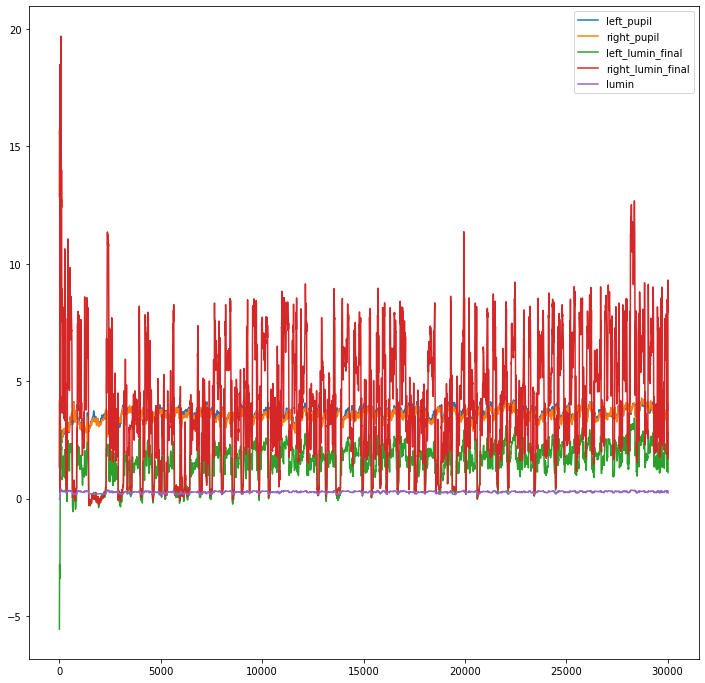

In [45]:
data_index =1
plt.figure(figsize=(12, 12))
plt.plot(data[data_index]['LeftPupilD'], label='left_pupil')
plt.plot(data[data_index]['RightPupilD'],label='right_pupil')
plt.plot(data[data_index]['adjust_pupil_left'], label='left_lumin_final')
plt.plot(data[data_index]['adjust_pupil_right'], label='right_lumin_final')
plt.plot(data[data_index]['Lumin'], label='lumin')

plt.legend()
plt.show()